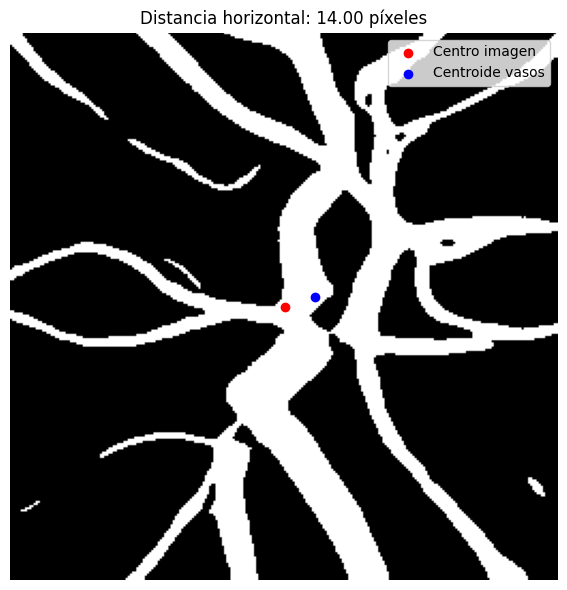

Centroide vasos: (142, 123)
Centro imagen: (128, 128)
Distancia horizontal: 14.00 píxeles


In [ ]:
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = "/content/drive/MyDrive/4º Curso/Segundo cuatrimestre/TFG/segmentadas/r2_Im034.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Umbral para binarizar
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Calcular momentos para el centroide de los vasos (píxeles blancos)
M = cv2.moments(binary)

if M["m00"] != 0:
    cx_vasos = int(M["m10"] / M["m00"])
    cy_vasos = int(M["m01"] / M["m00"])
else:
    cx_vasos, cy_vasos = 0, 0  # Imagen vacía o sin píxeles blancos

# Calcular el centro de la imagen
h, w = binary.shape
cx_img, cy_img = w // 2, h // 2

# Calcular distancia horizontal en valor absoluto
dist_horizontal = abs(cx_vasos - cx_img)

# Visualizar
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')
plt.scatter([cx_img], [cy_img], color='red', label='Centro imagen')
plt.scatter([cx_vasos], [cy_vasos], color='blue', label='Centroide vasos')
plt.legend()
plt.title(f"Distancia horizontal: {dist_horizontal:.2f} píxeles")
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Centroide vasos: ({cx_vasos}, {cy_vasos})")
print(f"Centro imagen: ({cx_img}, {cy_img})")
print(f"Distancia horizontal: {dist_horizontal:.2f} píxeles")

# Para un directorio entero

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

# Función para calcular la distancia horizontal del centroide
def calculate_horizontal_centroid_distance(img_path):
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Advertencia: No se pudo cargar la imagen en {img_path}. Devolviendo 0.0.")
            return 0.0

        # Umbral para binarizar
        _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

        # Calcular momentos para el centroide de los vasos (píxeles blancos)
        M = cv2.moments(binary)

        if M["m00"] != 0: # Aseguramos que no hay división por 0
            cx_vasos = int(M["m10"] / M["m00"])
            cy_vasos = int(M["m01"] / M["m00"]) # No es necesario para la distancia horizontal
        else:
            cx_vasos = 0

        # Calcular el centro de la imagen
        h, w = binary.shape
        cx_img = w // 2

        # Calcular distancia horizontal en valor absoluto
        dist_horizontal = abs(cx_vasos - cx_img)
        return dist_horizontal

    except Exception as e:
        print(f"Error calculando la distancia horizontal para {img_path}: {e}. Devolviendo 0.0.")
        return 0.0

# Configuración de Rutas
csv_input_path = '/content/drive/MyDrive/4º Curso/Segundo cuatrimestre/TFG/Clasificación/test_RIMONE.csv'
segmented_images_directory = '/content/drive/MyDrive/4º Curso/Segundo cuatrimestre/TFG/Clasificación/test_segmentado'

# Cargar el CSV existente
try:
    df = pd.read_csv(csv_input_path)
    print(f"CSV '{csv_input_path}' cargado exitosamente.")
    print("Columnas actuales:", df.columns.tolist())
except FileNotFoundError:
    print(f"Error: El archivo CSV en '{csv_input_path}' no fue encontrado. Asegúrate de que la ruta es correcta.")
    exit()

# Identificar la columna de nombres de imagen
image_name_col = df.columns[0]
print(f"Columna de nombres de imagen identificada: '{image_name_col}'")

# Guardar la última columna para reinsertarla al final
last_col_name = df.columns[-1]
last_col_data = df[last_col_name]
df = df.drop(columns=[last_col_name])

# Lista para almacenar las nuevas distancias calculadas
horizontal_distances_list = []

# Procesar cada imagen y calcular la nueva característica
print("\nIniciando cálculo de la distancia horizontal del centroide para cada imagen...")
for index, row in df.iterrows():
    image_filename = row[image_name_col]
    full_image_path = os.path.join(segmented_images_directory, image_filename)

    # print(f"Procesando imagen: {image_filename} ({index + 1}/{len(df)})")

    distancia = calculate_horizontal_centroid_distance(full_image_path)
    horizontal_distances_list.append(distancia)

# Añadir la nueva columna al DataFrame
df['Dist_Horizontal_Centroide'] = horizontal_distances_list

# Reinsertar la última columna original en su lugar
df[last_col_name] = last_col_data

# Guardar el CSV actualizado
output_csv_path = csv_input_path.replace('.csv', '_with_HCD.csv')
try:
    df.to_csv(output_csv_path, index=False)
    print(f"\nCSV actualizado guardado exitosamente en '{output_csv_path}'")
    print("\nPrimeras 5 filas del CSV actualizado:")
    print(df.head())
    print("\nColumnas del CSV actualizado:", df.columns.tolist())
except Exception as e:
    print(f"Error al guardar el CSV actualizado: {e}")

CSV '/content/drive/MyDrive/4º Curso/Segundo cuatrimestre/TFG/Clasificación/test_RIMONE.csv' cargado exitosamente.
Columnas actuales: ['nombre_archivo', 'aOD', 'sOD', 'aNR', 'N_ISNT', 'I_ISNT', 'T_ISNT', 'S_ISNT', 'aOC', 'sOC', 'aCDR', 'vCDR', 'hCDR', 'Wmin_rim', 'wRDR', 'Etiqueta']
Columna de nombres de imagen identificada: 'nombre_archivo'

Iniciando cálculo de la distancia horizontal del centroide para cada imagen...

CSV actualizado guardado exitosamente en '/content/drive/MyDrive/4º Curso/Segundo cuatrimestre/TFG/Clasificación/test_RIMONE_with_HCD.csv'

Primeras 5 filas del CSV actualizado:
  nombre_archivo    aOD       sOD    aNR  N_ISNT  I_ISNT  T_ISNT  S_ISNT  \
0   r1_Im006.png  21365  1.088050  16879    69.0    36.0    30.0    35.0   
1   r1_Im022.png  17248  0.973684  13298    46.0    39.0    39.0    36.0   
2   r1_Im040.png  17521  0.954248  13384    46.0    41.0    26.0    38.0   
3   r1_Im042.png  14422  0.881944  12270    48.0    44.0    26.0    46.0   
4   r1_Im061.pn